In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbr
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


**IMPORTING**

In [21]:
df=pd.read_csv("TITANIC Data.csv") 

In [22]:
df.head(-5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [23]:
max_fare = df['Fare'].max()
min_fare = df['Fare'].min()

print("Maximum Fare: $", max_fare)
print("Minimum Fare: $", min_fare)

Maximum Fare: $ 512.3292
Minimum Fare: $ 0.0


In [24]:
df[df["Fare"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,0,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S
372,1264,0,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [26]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [27]:
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [29]:
import plotly.express  as px 

In [30]:
survival_count = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')


In [31]:
survival_count

,Sex,Survived,Count
0,female,1,152
1,male,0,266


In [32]:
fig = px.bar(survival_count,x='Sex',y='Count',
             color='Sex',labels={'Sex':'Gender','Count':'Survived'},
             title='Survive by gender')
fig.show()

**REPLACING MISSING VALUES**


In [33]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [34]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [35]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [36]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S


In [37]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [38]:
df['Age']=df['Age'].astype(int)

**Rename columns to thin out**

In [39]:
df.rename(columns={'SibSp':'SBL',})


,Survived,Pclass,Sex,Age,SBL,Parch,Fare,Embarked
0,0,3,male,34,0,0,7.8292,Q
1,1,3,female,47,1,0,7.0000,S
2,0,2,male,62,0,0,9.6875,Q
3,0,3,male,27,0,0,8.6625,S
4,1,3,female,22,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30,0,0,8.0500,S
414,1,1,female,39,0,0,108.9000,C
415,0,3,male,38,0,0,7.2500,S
416,0,3,male,30,0,0,8.0500,S


In [40]:
df['Sex']=df['Sex'].map({'male':'Male','female':'Female'})

In [41]:
exchanging_rate=1.22
df['Fare']=df['Fare']*exchanging_rate

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Male,34,0,0,9.551624,Q
1,1,3,Female,47,1,0,8.540000,S
2,0,2,Male,62,0,0,11.818750,Q
3,0,3,Male,27,0,0,10.568250,S
4,1,3,Female,22,1,1,14.990750,S


In [43]:
df[['Age','Sex']].dtypes

Age     int32
Sex    object
dtype: object

In [44]:
import plotly.express as px 

In [45]:

fig=px.histogram(df,x='Age',title='Age Distrubtion',color='Sex')
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='Count')

<Axes: ylabel='count'>

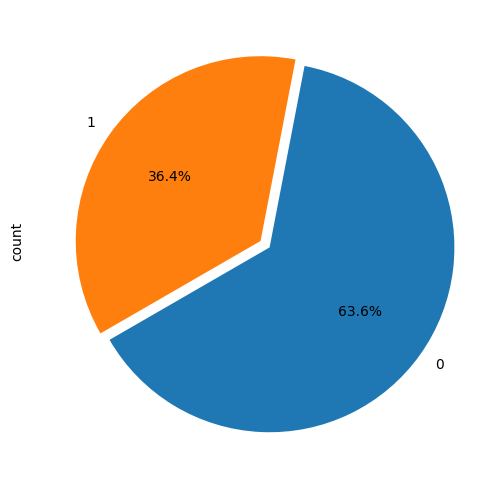

In [46]:
df['Survived'].value_counts().plot(kind='pie',explode=(0.06,0.0001),autopct='%0.1f%%',startangle=210,figsize=(6,6))

In [47]:
count=[152,266]
names=['survived','Notsurvived']

In [48]:
data=pd.DataFrame({'X':names,'Y':count})

In [49]:
data

,X,Y
0,survived,152
1,Notsurvived,266


In [50]:
fig=px.pie(data,values='Y', names='X', title='Pie Chart for Survived vs. Not Survived')
fig.show()

In [51]:
count=df['Survived'].value_counts()

In [52]:
count 

Survived
0    266
1    152
Name: count, dtype: int64

In [53]:
df['Sex']=df['Sex'].map({'Male':0,'Female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [54]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,9.551624,2
1,1,3,1,47,1,0,8.540000,0


In [55]:
correlation=df.corr()

<Axes: >

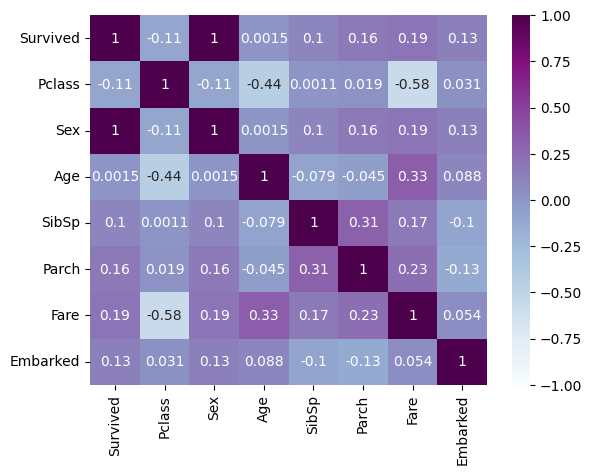

In [56]:
sbr.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True,cmap='BuPu')

In [57]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,9.551624,2
1,1,3,1,47,1,0,8.540000,0
2,0,2,0,62,0,0,11.818750,2


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [59]:
y=df['Survived']
x=df.drop(['Survived'],axis=1)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=30)

In [61]:
print(f'x_trainshape:{(x_train)}')
print(f'x_trainshape:{(y_train)}')

x_trainshape:     Pclass  Sex  Age  SibSp  Parch        Fare  Embarked
190       2    0   34      1      0   31.720000         0
141       1    1   33      0      0  184.891000         0
192       3    0   11      1      1   17.690000         0
42        3    0   41      0      0    9.577000         0
170       3    0   30      0      0    9.211000         0
..      ...  ...  ...    ...    ...         ...       ...
386       3    0   24      0      0    9.485500         0
407       1    0   50      1      1  258.030000         1
140       3    1   10      5      2   57.218000         0
301       2    0   30      0      0   18.355876         1
293       1    0   53      1      1   99.867126         0

[334 rows x 7 columns]
x_trainshape:190    0
141    1
192    0
42     0
170    0
      ..
386    0
407    0
140    1
301    0
293    0
Name: Survived, Length: 334, dtype: int64


In [62]:
lgr=LogisticRegression()


In [63]:
lgr.fit(x_train,y_train)

LogisticRegression()

**using ROC and auc so we can know how the model classify the outputs**

In [64]:
from sklearn.metrics import roc_curve, auc

In [65]:
predicted=lgr.predict(x_test)

In [66]:
predicted

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [67]:
y_probs = lgr.predict_proba(x_test)[:, 1]

In [68]:
y_probs

array([0.93113463, 0.02617793, 0.95573283, 0.93495537, 0.02668773,
       0.02401387, 0.0333531 , 0.03468696, 0.95502571, 0.95256685,
       0.02302117, 0.03468696, 0.94553069, 0.03977518, 0.02852162,
       0.02495922, 0.93844201, 0.9337741 , 0.03457854, 0.02503724,
       0.93078766, 0.02300988, 0.03113574, 0.02398395, 0.95168051,
       0.0230381 , 0.95679586, 0.0267236 , 0.02928107, 0.93740133,
       0.95181345, 0.02861274, 0.92971734, 0.03005606, 0.95037868,
       0.02357667, 0.02350314, 0.96043183, 0.0362006 , 0.95752255,
       0.03285302, 0.02456955, 0.03426735, 0.02321106, 0.93574358,
       0.03486938, 0.02331872, 0.96290667, 0.03057526, 0.02366558,
       0.96674546, 0.98135703, 0.02965662, 0.93935587, 0.02351317,
       0.02334092, 0.02634517, 0.02896846, 0.0237874 , 0.07974705,
       0.95457817, 0.93366798, 0.03462183, 0.0287098 , 0.95255609,
       0.02933111, 0.92934178, 0.03614823, 0.95248497, 0.02306635,
       0.02360165, 0.02676539, 0.02526954, 0.03510018, 0.02659

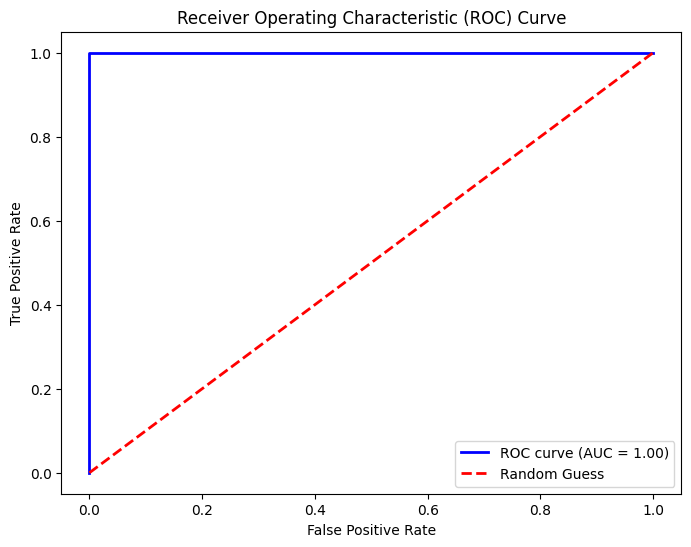

In [69]:
# Calculating the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, predicted)

# Calculating the AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**the model is a perfect classifier**

In [70]:
accuracy_score(y_test,predicted)

1.0

In [71]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,9.551624,2
1,1,3,1,47,1,0,8.540000,0


In [72]:
input_data = np.array([[1, 1, 30, 4,2,8.661555,0]])  # Assuming you have 4 features
predictions = lgr.predict(input_data)

c:\Users\utilisateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [73]:
predictions

array([1], dtype=int64)